In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcdefaults()

# Canny Edge Detector

## Ideal Jet

A idealized meandering jets with rings, as a 2D numpy array (embeded in Xarray).

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
from fronts_toolbox._fields import ideal_jet, sample
from fronts_toolbox.canny import canny_xarray

In [3]:
# A colormap for overlaying the detected fronts
from matplotlib.colors import ListedColormap

cmap_fronts = ListedColormap([(0, 0, 0, 0), (0, 0, 0, 1)])

In [4]:
sst = xr.DataArray(ideal_jet(), name="sst", dims=("lat", "lon"))
edges = canny_xarray(sst)

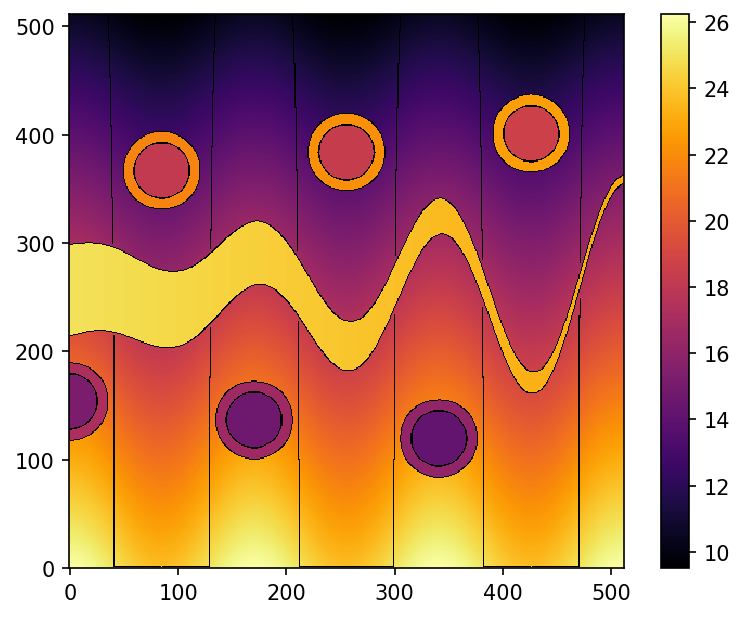

In [5]:
fig, ax = plt.subplots(dpi=150)

sst.plot.imshow(ax=ax, cmap="inferno", add_labels=False)
edges.plot.imshow(
    ax=ax, cmap=cmap_fronts, add_labels=False, add_colorbar=False
)
ax.set_aspect("equal")

## ESA-SST-CCI / C3S Data

SST of the North Atlantic, as a Dask array embeded in Xarray.

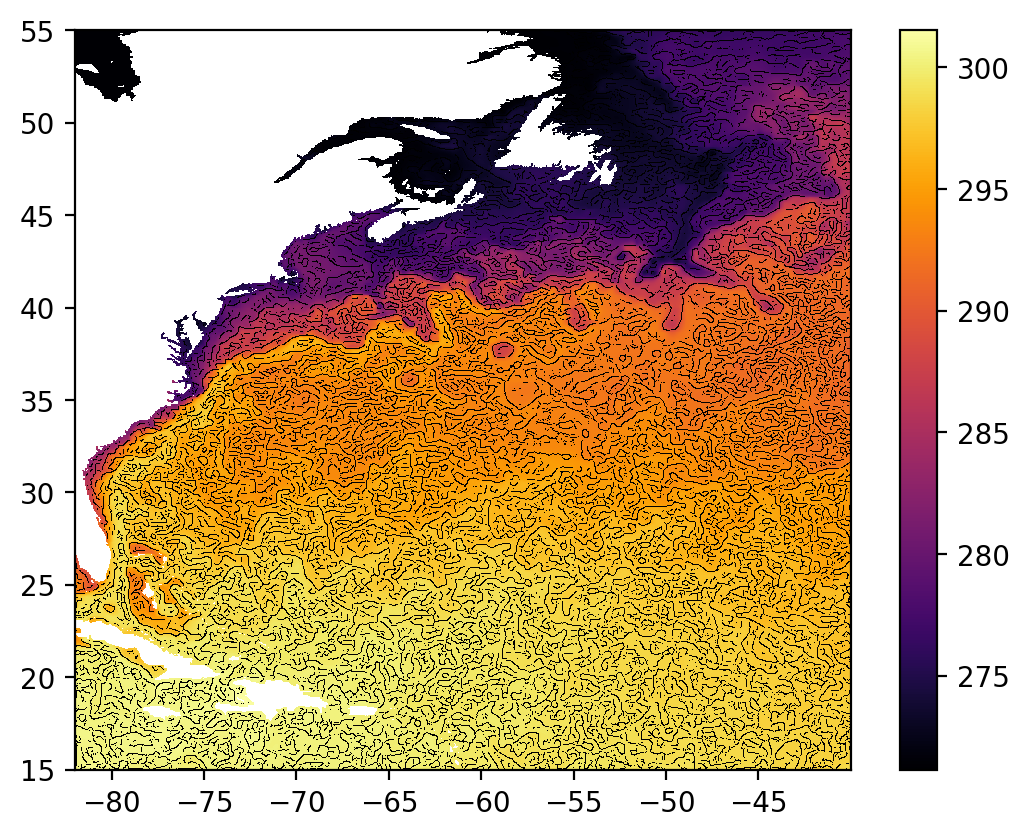

In [6]:
sst = (
    sample("ESA-CCI-C3S")
    .analysed_sst.sel(lat=slice(15, 55), lon=slice(-82, -40))
    .chunk(lat=256, lon=256)
)
# Hysteresis does not support chunked core dimensions
edges = canny_xarray(sst, hysteresis=False)

fig, ax = plt.subplots(dpi=200)

sst.isel(time=0).plot.imshow(
    ax=ax, cmap="inferno", add_labels=False, center=False
)
edges.isel(time=0).plot.imshow(
    ax=ax, cmap=cmap_fronts, add_labels=False, add_colorbar=False
)

ax.set_aspect("equal")